# Task 1: Symptom Co-occurrence Analysis

## Objective
The goal of this task is to analyse the co-occurrence patterns of different symptoms within disease profiles. Specifically, the task aims to identify combinations of symptoms that frequently appear together in the same disease.

## Method
Implement the Apriori algorithm to analyse the Disease Symptom dataset, identifying common combinations of symptoms that frequently co-occur within the same disease profile.


## 1. Setup and Environment
Helper functions are created in the src folder to process our datasets and mine patterns in our data. Below are the 2 files used to implement these functions:

- SymptomDataProcessor
    - Contains functions to clean and create "baskets" for each transaction

- SymptomPatternMiner
    - Contains functions to encode the items and perform pattern mining

In [1]:
import sys
from pathlib import Path

# Add project root to Python path to import custom modules
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))

from src.processors.symptom_data_processor import SymptomDataProcessor
from src.analysis.symptom_pattern_miner import SymptomPatternMiner

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries and modules imported successfully.")


/Users/iainrodericktay/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Libraries and modules imported successfully.


## 2. Data Loading and Preprocessing
First we load the dataset for **Disease Symptom**, which contains information linking diseases to their associated symptoms

Data Columns:
* *Disease:* Name of the disease
* *Symptom_1* to *Symptom_17*: Various symptoms associated with each disease

We also have additional files containing *symptom descriptions*, *precautions* and *severity weights*


### Data Preprocessing

**Data Preparation:** We start by grouping the symptoms into "baskets", so each disease has a list of symptoms that appear with it

**Data Cleaning:** To avoid redundancy, we have normalized the names of the symptoms and removed any spaces or underscores

In [ ]:
# Define the path to the dataset using the project_root variable
# This ensures the path is always correct, regardless of where the notebook is run
DATA_PATH = project_root / 'data' / 'dataset.csv'

# Initialize and run the data processor
processor = SymptomDataProcessor(data_path=DATA_PATH)
transactions = processor.process_data()

print(f"Successfully processed {len(transactions)} transactions.")
print("Example transaction:", transactions[0])

Processing symptoms: 100%|██████████| 4920/4920 [00:00<00:00, 11490.99it/s]

Successfully processed 4920 transactions.
Example transaction: ['itch', 'skin rash', 'nodal skin eruptions', 'dischromic  patches']


## 3. Apriori Algorithm and Association Rule Mining

We will be using the implementation of `apriori` from `mlxtend` to mine the frequent itemsets in our dataset
- A `min_support` of 0.02 is used to generate the frequent itemsets

TODO: Maybe can play around to see what support is good (Maybe 2-10%?) -- Then we can justify it with some reason too (like put support higher so we dont generate itemsets that are not informative)

From here, we can then generate some association rules
- With the generated rules, we can analyse the different patterns of symptoms associated with different diseases


In [3]:
# Initialize the pattern miner.
# NOTE: A `min_support` of 0.01 is too low for this dataset and will likely cause a memory error, crashing the kernel.
# A value of 0.02 or higher is recommended for stable performance.
miner = SymptomPatternMiner(transactions, min_support=0.02)

# Mine for frequent itemsets
frequent_itemsets = miner.mine_frequent_itemsets()

# Generate association rules with a minimum confidence of 50%
rules = miner.generate_association_rules(metric="confidence", min_threshold=0.5)

# --- Save Results to CSV ---
# This allows the analysis section to load pre-computed results,
# either from this run or from a previous run of the `symptom_analysis.py` script.
output_dir = project_root / 'outputs'
output_dir.mkdir(exist_ok=True) # Ensure the directory exists

itemsets_path = output_dir / 'frequent_itemsets.csv'
rules_path = output_dir / 'association_rules.csv'

frequent_itemsets.to_csv(itemsets_path, index=False)
rules.to_csv(rules_path, index=False)

print("Frequent itemsets and association rules have been saved to the 'outputs' directory.")
print(f"Itemsets saved to: {itemsets_path}")
print(f"Rules saved to: {rules_path}")

Frequent itemsets and association rules have been saved to the 'outputs' directory.
Itemsets saved to: /Users/iainrodericktay/SC4020-Group-Project-2/outputs/frequent_itemsets.csv
Rules saved to: /Users/iainrodericktay/SC4020-Group-Project-2/outputs/association_rules.csv


## 4. Load and Analyze Results

The pre-computed results from the `outputs` directory will be loaded to avoid rerunning the itemsets and rules generation. 

These files can be generated by running the cell above, or by running the main analysis script: `python scripts/symptom_analysis.py`.

This separates the time-consuming mining process from the interactive analysis and visualization.


### Analysis of results
To get a quick overview of out results, we will load the **Top 10 Most Frequent Itemsets**, along with the **Top 10 Most Cofident Association Rules**. An explanation of the association rules and the terms involved will be provided below the cell output.

In [4]:
# --- Load Results from CSV ---
# Load the frequent itemsets and association rules from the files saved in the 'outputs' directory.

itemsets_path = project_root / 'outputs' / 'frequent_itemsets.csv'
rules_path = project_root / 'outputs' / 'association_rules.csv'

try:
    frequent_itemsets_from_csv = pd.read_csv(itemsets_path)
    rules_from_csv = pd.read_csv(rules_path)
    
    print("Successfully loaded pre-computed results from CSV files.")
    
    print("\nFrequent Itemsets (Top 10):")
    display(frequent_itemsets_from_csv.head(10))
    
    print("\nAssociation Rules (Top 10):")
    display(rules_from_csv.head(10))
    
except FileNotFoundError:
    print("CSV files not found. Please run the mining cell above or the `symptom_analysis.py` script first.")



Successfully loaded pre-computed results from CSV files.

Frequent Itemsets (Top 10):


,support,itemsets
0,0.209756,frozenset({'abdominal pain'})
1,0.048780,frozenset({'abnormal menstruation'})
2,0.023171,frozenset({'acute liver failure'})
3,0.023171,frozenset({'altered sensorium'})
4,0.023171,frozenset({'anxiety'})
5,0.046341,frozenset({'back pain'})
6,0.023171,frozenset({'belly pain'})
7,0.021951,frozenset({'blackhead'})
8,0.023171,frozenset({'bladder discomfort'})
9,0.023171,frozenset({'blister'})



Association Rules (Top 10):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({'acute liver failure'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.023171,1.000000,4.767442,1.0,0.018311,inf,0.808989,0.110465,1.000000,0.555233
1,frozenset({'belly pain'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.021951,0.947368,4.516524,1.0,0.017091,15.014634,0.797059,0.104046,0.933398,0.526010
2,frozenset({'coma'}),frozenset({'abdominal pain'}),0.024390,0.209756,0.024390,1.000000,4.767442,1.0,0.019274,inf,0.810000,0.116279,1.000000,0.558140
3,frozenset({'dark urine'}),frozenset({'abdominal pain'}),0.115854,0.209756,0.110976,0.957895,4.566707,1.0,0.086675,18.768293,0.883365,0.517045,0.946719,0.743482
4,frozenset({'abdominal pain'}),frozenset({'dark urine'}),0.209756,0.115854,0.110976,0.529070,4.566707,1.0,0.086675,1.877447,0.988333,0.517045,0.467362,0.743482
5,frozenset({'distention of abdomen'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.021951,0.947368,4.516524,1.0,0.017091,15.014634,0.797059,0.104046,0.933398,0.526010
6,frozenset({'abdominal pain'}),frozenset({'fatigue'}),0.209756,0.392683,0.112195,0.534884,1.362126,1.0,0.029827,1.305732,0.336420,0.228856,0.234146,0.410299
7,frozenset({'fluid overload'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.021951,0.947368,4.516524,1.0,0.017091,15.014634,0.797059,0.104046,0.933398,0.526010
8,frozenset({'history of alcohol consumption'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.021951,0.947368,4.516524,1.0,0.017091,15.014634,0.797059,0.104046,0.933398,0.526010
9,frozenset({'internal itching'}),frozenset({'abdominal pain'}),0.023171,0.209756,0.021951,0.947368,4.516524,1.0,0.017091,15.014634,0.797059,0.104046,0.933398,0.526010


### Explanation of Association Rule Metrics
This section provides explanations for the terms used in the association rules.

For a rule **"IF {A} THEN {B}"**:

| Column | Simple Explanation | In Technical Terms |
| :--- | :--- | :--- |
| **`antecedents`** | The "IF" part of the rule. This is symptom set {A}. | `antecedents` |
| **`consequents`** | The "THEN" part of the rule. This is symptom set {B}. | `consequents` |
| **`antecedent support`** | How often symptom {A} appears in the entire dataset. | `support(A)` |
| **`consequent support`** | How often symptom {B} appears in the entire dataset. | `support(B)` |
| **`support`** | How often {A} and {B} appear **together** in the dataset. | `support(A U B)` |
| **`confidence`** | **The rule's reliability.** "If a patient has {A}, what's the probability they also have {B}?" Higher is better. | `support(A U B) / support(A)` |
| **`lift`** | **The rule's importance.** How much more likely {B} is to appear when {A} is present. `> 1` is good. Higher is better. | `confidence(A->B) / support(B)` |
| **`leverage`** | The difference between how often {A} and {B} appear together versus how often they would if they were independent. `> 0` means they appear together more than expected. | `support(A U B) - (support(A) * support(B))` |
| **`conviction`** | A measure of the rule's implication. A high value means the consequent {B} is highly dependent on the antecedent {A}. An `inf` (infinity) value is very strong. | `(1 - support(B)) / (1 - confidence(A->B))` |
| **`zhangs_metric`** | A more advanced measure of association that ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation). 0 indicates independence. | A value that considers both support and confidence. |
| **`kulczynski`** | The average of the two confidence scores (`A->B` and `B->A`). It's a symmetric measure of how strongly the two are related. | `0.5 * (confidence(A->B) + confidence(B->A))` |


## 5. Visualization


/Users/iainrodericktay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iainrodericktay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/iainrodericktay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


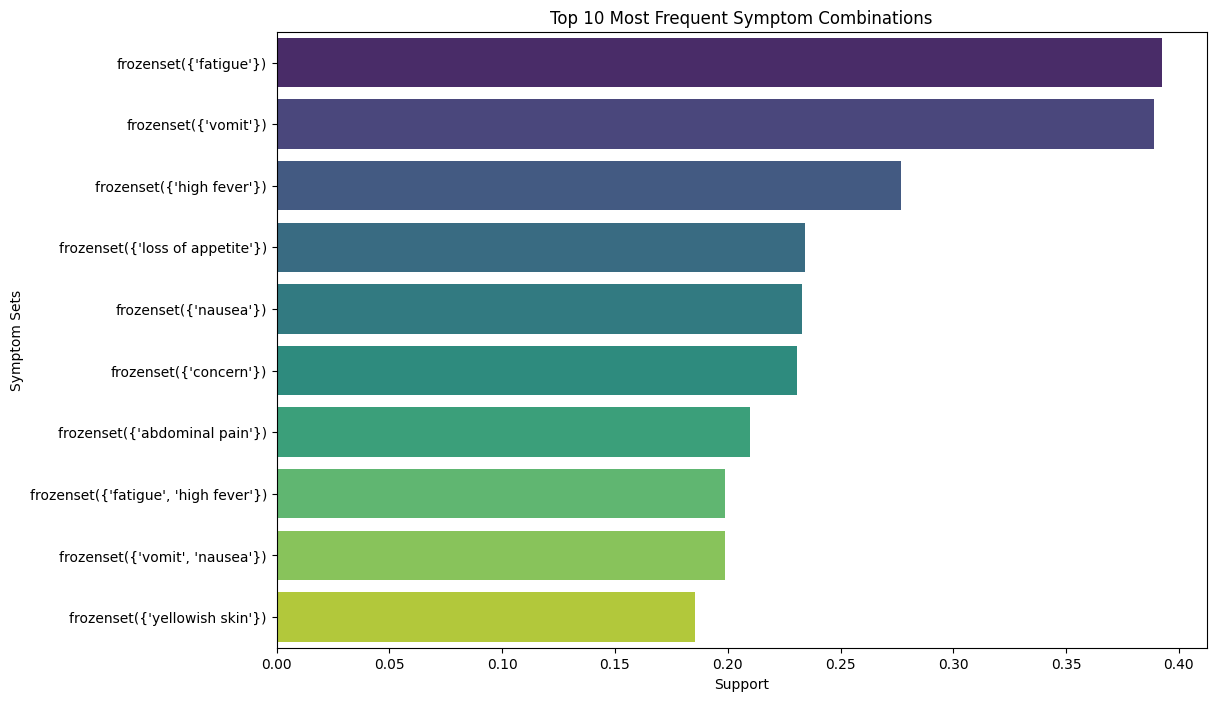

In [5]:
# This visualization uses the data loaded from the CSV files.
import ast

# Get top 10 most frequent itemsets from the DataFrame we loaded from the CSV
top_itemsets = frequent_itemsets_from_csv.nlargest(10, 'support')

# The 'itemsets' column is loaded as a string, e.g., "frozenset({'fatigue', 'vomiting'})".
# We need to convert this string back into a plottable format.
def format_itemset_str(itemset_str):
    try:
        # Use ast.literal_eval to safely evaluate the string representation
        s = ast.literal_eval(itemset_str)
        # It's likely a frozenset, so convert to list and join for a clean label
        return ', '.join(list(s))
    except (ValueError, SyntaxError):
        # If something goes wrong, return the original string
        return itemset_str

# Prepare data for plotting by creating a new, clean string column for the labels
top_itemsets['itemsets_str'] = top_itemsets['itemsets'].apply(format_itemset_str)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='support', y='itemsets_str', data=top_itemsets, palette='viridis')
plt.title('Top 10 Most Frequent Symptom Combinations')
plt.xlabel('Support')
plt.ylabel('Symptom Sets')
plt.show()


# TODO:
- Include diseases into the analysis
- Deep dives:
    - Look into rules with high confidence and lifts
    - Look into symptoms with lower support (uncommon) but strong association (Zhang’s metric or Jaccard index)
    - *Leverage and Conviction (Need to look into this more*)
- Rule pruning (remove rules that dont meet confidence or lift)
- **(Stretch)** Test Hypotheses
    - Eg: Based on the frequent itemsets and rules, you can form hypotheses about possible disease-symptom relationships: For example, if "abdominal pain" often co-occurs with dark urine, it could suggest a relationship with liver diseases or kidney issues. Investigating this with medical knowledge or literature can help confirm or refute these associations.